# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
# 使用RMSprop

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, decay=1e-6, rho=0.9)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tr

50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [=======

Epoch 41/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50

50000/50000 [==============================] - 4s 72us/step - loss: 0.8773 - acc: 0.6850 - val_loss: 1.8437 - val_acc: 0.4694
Epoch 43/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.8610 - acc: 0.6925 - val_loss: 1.8005 - val_acc: 0.4784
Epoch 44/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.8465 - acc: 0.6946 - val_loss: 1.8883 - val_acc: 0.4784
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.8410 - acc: 0.6986 - val_loss: 1.7865 - val_acc: 0.4872
Epoch 46/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.8217 - acc: 0.7075 - val_loss: 1.8874 - val_acc: 0.4783
Epoch 47/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.8170 - acc: 0.7055 - val_loss: 1.7981 - val_acc: 0.4841
Epoch 48/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.8025 - acc: 0.7124 - val_loss: 1.8703 - val_acc: 0.4975
Epoch 49/50
50000/50000 [=====================

Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.0019 - acc: 0.6504 - val_loss: 1.3740 - val_acc: 0.5169
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.9911 - acc: 0.6554 - val_loss: 1.3698 - val_acc: 0.5227
Epoch 46/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.9780 - acc: 0.6607 - val_loss: 1.4682 - val_acc: 0.4967
Epoch 47/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.9732 - acc: 0.6615 - val_loss: 1.3336 - val_acc: 0.5401
Epoch 48/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.9614 - acc: 0.6621 - val_loss: 1.3646 - val_acc: 0.5318 - acc
Epoch 49/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.9505 - acc: 0.6718 - val_loss: 1.4056 - val_acc: 0.5152
Epoch 50/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.9377 - acc: 0.6755 - val_loss: 1.4012 - val_acc: 0.5146
Experiment with LR = 0.00001

50000/50000 [==============================] - 4s 73us/step - loss: 1.4208 - acc: 0.5082 - val_loss: 1.4781 - val_acc: 0.4777
Epoch 46/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4165 - acc: 0.5092 - val_loss: 1.4711 - val_acc: 0.4800
Epoch 47/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4118 - acc: 0.5109 - val_loss: 1.4657 - val_acc: 0.4800
Epoch 48/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4076 - acc: 0.5127 - val_loss: 1.4670 - val_acc: 0.4769
Epoch 49/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4026 - acc: 0.5136 - val_loss: 1.4612 - val_acc: 0.4832
Epoch 50/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.3982 - acc: 0.5150 - val_loss: 1.4617 - val_acc: 0.4798


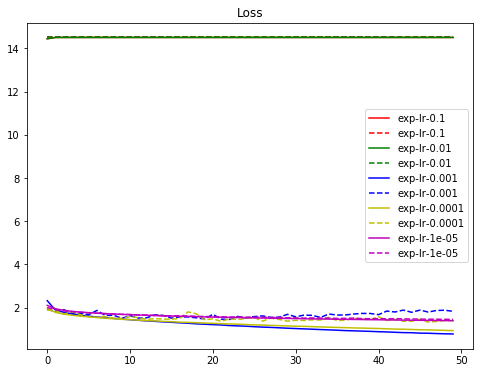

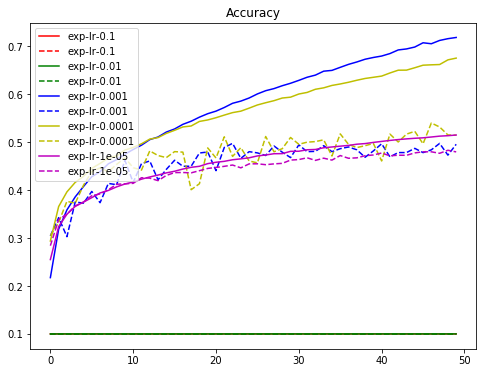

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()